In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


# Data Preprocessing

In [2]:
df = pd.read_excel("02 Churn-Dataset.xlsx")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,0,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,5,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,0,0,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.515689,0.419566
std,0.368612,24.559481,30.090047,1.275299,1.250117
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,0.000000,0.000000
max,1.000000,72.000000,118.750000,5.000000,9.000000


# Data Cleaning

Data Cleaning
- Null values
- Duplicates
- Wrong values
- Wrong format
 

In [5]:
# Checking for null values

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [6]:
# Identified rows with spaces " "
# df.loc[488]
df.TotalCharges.replace(" ",None,inplace=True)
df.replace(" ",None,inplace=True)


In [7]:
# Reindexing
df.reset_index(drop=True,inplace=True)

In [8]:
# Dropping null values
df.dropna(inplace=True)

In [9]:
# Checking for duplicates
df.duplicated().sum()

0

In [10]:
# Changing data format to categorical data

df["gender"] = df["gender"].astype('category')
# df["SeniorCitizen"] = df["SeniorCitizen"].astype('category')
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])


In [11]:
# Automating datatype conversion
for i in df.columns[1:]:
    if str(df[i].dtype) == 'object':
        df[i] = df[i].astype('category')

In [12]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,-0.000621,0.093121
tenure,0.015683,1.000000,0.246862,0.825880,0.000344,0.214777
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.008717,0.244920
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.007200,0.283839
numAdminTickets,-0.000621,0.000344,0.008717,0.007200,1.000000,-0.007820
numTechTickets,0.093121,0.214777,0.244920,0.283839,-0.007820,1.000000


Data is clean
some correlation
Total Charges and Tenure
Total Charges and Monthly Charges

# Machine Learning

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

In [14]:
print(df.Churn.unique())
print(df.Churn.value_counts())

['No', 'Yes']
Categories (2, object): ['No', 'Yes']
No     5163
Yes    1869
Name: Churn, dtype: int64


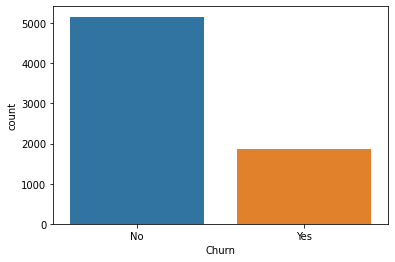

In [15]:
sns.countplot(x="Churn", data=df)
plt.show()

In [16]:
churn = len(df[df["Churn"] == "Yes"])
no_churn = len(df[df["Churn"] == "No"])
perc_churn = (churn*100)/len(df)
perc_nochurn = (no_churn*100)/len(df)
print(f"percentage of churn: {perc_churn:.1f}")
print(f"percentage of no churn: {perc_nochurn:.1f}")

percentage of churn: 26.6
percentage of no churn: 73.4


Encoding categorical data using OneHotEncoder

In [17]:
# Automating the encoding
from sklearn.preprocessing import OneHotEncoder
for i in df.columns[1:-1]:
    if str(df[i].dtype) == 'category':
        encoder = OneHotEncoder()
        onehotarray = encoder.fit_transform(df[[i]]).toarray()
        items = [f'{i}_{item}' for item in encoder.categories_[0]]
        df[items] = onehotarray

Encoding the Values for Churn using OrdinalEncoder

In [18]:
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray
# defining ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(df[["Churn"]])
df["Churn"] = result

In [19]:
df["Churn"] = df["Churn"].astype('category')

In [20]:
df["Churn"] = df["Churn"].apply(lambda x: int(x))

In [21]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 64 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   customerID                               7032 non-null   object  
 1   gender                                   7032 non-null   category
 2   SeniorCitizen                            7032 non-null   int64   
 3   Partner                                  7032 non-null   category
 4   Dependents                               7032 non-null   category
 5   tenure                                   7032 non-null   int64   
 6   PhoneService                             7032 non-null   category
 7   MultipleLines                            7032 non-null   category
 8   InternetService                          7032 non-null   category
 9   OnlineSecurity                           7032 non-null   category
 10  OnlineBackup                        

In [22]:
df.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Test p-value for significance

In [23]:
from scipy import stats

corr_df = pd.DataFrame(columns=['r', 'P-value'])

for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        r , p = stats.pearsonr(df.Churn, df[col])
        corr_df.loc[col] = [round(r, 4), round(p, 4)]
    
corr_df

,r,P-value
SeniorCitizen,0.1505,0.0000
tenure,-0.3540,0.0000
MonthlyCharges,0.1929,0.0000
TotalCharges,-0.1995,0.0000
numAdminTickets,-0.0196,0.1009
numTechTickets,0.3571,0.0000
gender_Female,0.0085,0.4737
gender_Male,-0.0085,0.4737
Partner_No,0.1500,0.0000
Partner_Yes,-0.1500,0.0000


Drop statistically insignificant columns i.e. customer_id, numAdminTickets, gender_Female, gender_Male,PhoneService_No,PhoneService_Yes, MultipleLines_No phone service,PaymentMethod,PaperlessBilling,Contract,StreamingMovies,StreamingTV,TechSupport,DeviceProtection,OnlineBackup, OnlineSecurity,InternetService,MultipleLines,PhoneService,Dependents,Partner,gender,Churn

In [24]:
y = df.Churn.values
x_data = df.drop(["customerID", "numAdminTickets", "gender_Female", "gender_Male","PhoneService_No","PhoneService_Yes", "MultipleLines_No phone service", "PaymentMethod", "PaperlessBilling", "Contract", "StreamingMovies", "StreamingTV", "TechSupport", "DeviceProtection", "OnlineBackup", "OnlineSecurity", "InternetService", "MultipleLines", "PhoneService", "Dependents", "Partner", "gender", "Churn"], axis='columns') 

In [25]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   numTechTickets                           7032 non-null   int64  
 5   Partner_No                               7032 non-null   float64
 6   Partner_Yes                              7032 non-null   float64
 7   Dependents_No                            7032 non-null   float64
 8   Dependents_Yes                           7032 non-null   float64
 9   MultipleLines_No                         7032 non-null   float64
 10  MultipleLines_Yes                        7032 no

Normalization 

In [26]:
#Normalization to handle unbalanced features 
x = (x_data - x_data.min())/(x_data.max() - x_data.min()).values
x.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numTechTickets,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.442560,0.463166,0.261309,0.046691,0.517491,0.482509,0.701507,0.298493,0.481371,...,0.388367,0.551052,0.209329,0.239619,0.407281,0.592719,0.219283,0.216297,0.336320,0.228100
std,0.368844,0.345708,0.299363,0.261571,0.138998,0.499729,0.499729,0.457629,0.457629,0.499688,...,0.487414,0.497422,0.406858,0.426881,0.491363,0.491363,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.112676,0.172512,0.044155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.394366,0.518408,0.159090,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.760563,0.712562,0.435719,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Split data

In [27]:
# Split the data into training and test set. We use 20% test data with a random state of 42 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)
print(x_train.shape, x_test.shape) 

(5625, 41) (1407, 41)


# Logistic Regression Model

Train Model

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5251).fit(x_train, y_train)


Get results

In [29]:
# Attributes of the model
lr_score = model.score(x_test,y_test)
y_pred1 = model.predict(x_test)
print(f"Test accuracy: {lr_score}")
print(f"intercept: {model.intercept_}")     #value of y when x = 0
print(f"slope: {model.coef_}")              #gradient of slope

Test accuracy: 0.8578535891968728
intercept: [-1.08247182]
slope: [[ 2.83628435e-01 -4.09691882e+00 -1.55729724e-01 -1.48601019e+00
   1.05507575e+01 -9.16361416e-03  7.85260069e-03  7.53095386e-02
  -7.66205521e-02 -3.53518226e-01 -3.24806897e-02 -4.04674550e-01
   4.89868533e-01 -8.65049971e-02  2.72972134e-01 -8.65049971e-02
  -1.87778150e-01  2.05557637e-01 -8.65049971e-02 -1.20363653e-01
   6.23087126e-02 -8.65049971e-02  2.28852711e-02  1.55091683e-01
  -8.65049971e-02 -6.98976996e-02  4.37611757e-02 -8.65049971e-02
   4.14328079e-02  2.23503178e-02 -8.65049971e-02  6.28436659e-02
   9.29657755e-01  1.26840516e-01 -1.05780928e+00 -1.69350830e-01
   1.68039816e-01  4.15735341e-02 -1.99918467e-01  2.95181271e-01
  -1.38147352e-01]]


Predict results

In [30]:
# y_pred = model.predict(x_test)
print(f"predicted response:\n{y_pred1}\nActual response:\n{y_test}")

predicted response:
[0 0 0 ... 1 0 0]
Actual response:
[0, 0, 0, 1, 1, ..., 0, 1, 1, 0, 0]
Length: 1407
Categories (2, int64): [0, 1]


Check accuracy score alternatively

In [31]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))

Model accuracy score: 0.8579


Printing and visualizing confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
print('Confusion matrix\n\n', cm1)
print('\nTrue Positives(TP) = ', cm1[0,0])
print('\nTrue Negatives(TN) = ', cm1[1,1])
print('\nFalse Positives(FP) = ', cm1[0,1])
print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix

 [[953  85]
 [115 254]]

True Positives(TP) =  953

True Negatives(TN) =  254

False Positives(FP) =  85

False Negatives(FN) =  115


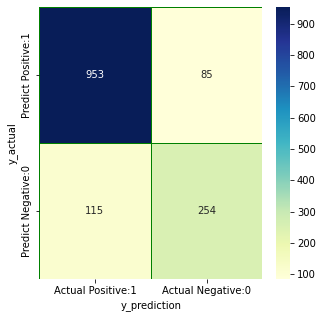

In [33]:
# heatmap visulization of confusion matrix
cm_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
f, ax = plt.subplots(figsize =(5, 5))
sns.heatmap(cm_matrix, annot=True, linewidth=1, linecolor="green", fmt=".0f", cmap='YlGnBu', ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()    

# KNN Classification Approach

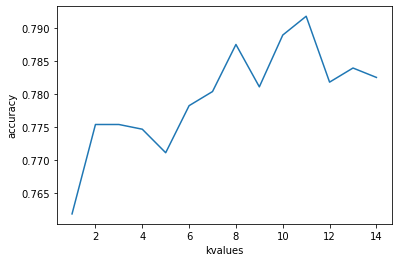

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# testing differnt vaues of k with accuracy to determine the most favorable
# k ranges from 1-15
score_list = []
for i in range(1, 15):
    knn_test = KNeighborsClassifier(n_neighbors = i)
    knn_test.fit(x_train, y_train)
    score_list.append(knn_test.score(x_test, y_test))
    
plt.plot(range(1, 15), score_list)
plt.xlabel("kvalues")
plt.ylabel("accuracy")
plt.show()

In [35]:
#K = 11 has the hightst prediction accuracy
k= 11
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
y_pred2 = knn.predict(x_test)
print("{} nn score: {}".format(k, knn.score(x_test, y_test)))

knn_score = knn.score(x_test, y_test)

11 nn score: 0.7917555081734187


In [36]:
# Alternatively
from sklearn.metrics import accuracy_score
print('KNN Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

KNN Model accuracy score: 0.7918


Printing and visualizing confusion matrix 

In [37]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred2)
print('Confusion matrix\n\n', cm2)
print('\nTrue Positives(TP) = ', cm2[0,0])
print('\nTrue Negatives(TN) = ', cm2[1,1])
print('\nFalse Positives(FP) = ', cm2[0,1])
print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix

 [[909 129]
 [164 205]]

True Positives(TP) =  909

True Negatives(TN) =  205

False Positives(FP) =  129

False Negatives(FN) =  164


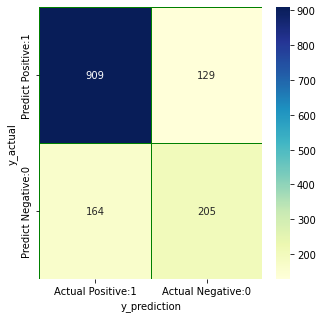

In [38]:
# Heatmap visualization of conusion matrix
cm_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
f, ax = plt.subplots(figsize =(5, 5))
sns.heatmap(cm_matrix, annot=True, linewidth=1, linecolor="green", fmt=".0f", cmap='YlGnBu', ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()  

# Decision Tree Approach

In [39]:
# Decision tree approach
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 50)
dt.fit(x_train, y_train)
dt_score = dt.score(x_test, y_test)
y_pred3 = dt.predict(x_test)

print("score: ", dt.score(x_test, y_test))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred3)))

score:  0.8102345415778252
Model accuracy score: 0.8102


Printing and visualizing the confusion matrix

In [40]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred3)
print('Confusion matrix\n\n', cm3)
print('\nTrue Positives(TP) = ', cm3[0,0])
print('\nTrue Negatives(TN) = ', cm3[1,1])
print('\nFalse Positives(FP) = ', cm3[0,1])
print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix

 [[901 137]
 [130 239]]

True Positives(TP) =  901

True Negatives(TN) =  239

False Positives(FP) =  137

False Negatives(FN) =  130


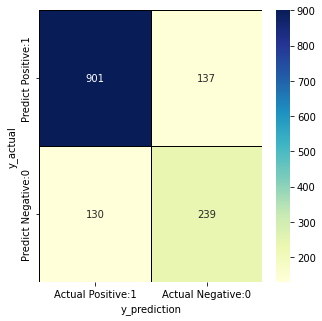

In [41]:
# Visualizing the confusion matrix
f, ax = plt.subplots(figsize = (5, 5))
cm_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, linewidths=1, linecolor="black",fmt='d', cmap='YlGnBu', ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

# Random Forest Classification

In [42]:
from sklearn.ensemble import RandomForestClassifier
# set n_estimators to 100 whcih means the model will use 100 subsets
rf = RandomForestClassifier(n_estimators = 100, random_state = 30)
rf.fit(x_train, y_train)
rf_score= rf.score(x_test, y_test)
y_pred4 = rf.predict(x_test)
print("random forest model score: ", rf_score)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred4)))

random forest model score:  0.8621179815209666
Model accuracy score: 0.8621


Printing and visualizing the confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred4)
print('Confusion matrix\n\n', cm4)
print('\nTrue Positives(TP) = ', cm4[0,0])
print('\nTrue Negatives(TN) = ', cm4[1,1])
print('\nFalse Positives(FP) = ', cm4[0,1])
print('\nFalse Negatives(FN) = ', cm4[1,0])

Confusion matrix

 [[962  76]
 [118 251]]

True Positives(TP) =  962

True Negatives(TN) =  251

False Positives(FP) =  76

False Negatives(FN) =  118


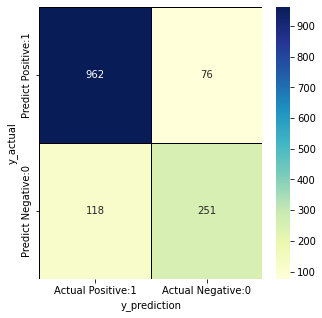

In [44]:
# confusion matrix
f, ax = plt.subplots(figsize = (5, 5))
cm_matrix = pd.DataFrame(data=cm4, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, linewidths=1, linecolor="black",fmt='d', cmap='YlGnBu', ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1038
           1       0.77      0.68      0.72       369

    accuracy                           0.86      1407
   macro avg       0.83      0.80      0.81      1407
weighted avg       0.86      0.86      0.86      1407



# Support Vector Machines

In [46]:
# SVM approach
from sklearn.svm import SVC
svm = SVC(random_state = 42)
svm.fit(x_train, y_train)
print("Accuracy of SVM: ", svm.score(x_test, y_test))
svm_score = svm.score(x_test, y_test)
y_pred5 = svm.predict(x_test)

Accuracy of SVM:  0.8464818763326226


In [47]:
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test, y_pred5)
print('Confusion matrix\n\n', cm5)
print('\nTrue Positives(TP) = ', cm5[0,0])
print('\nTrue Negatives(TN) = ', cm5[1,1])
print('\nFalse Positives(FP) = ', cm5[0,1])
print('\nFalse Negatives(FN) = ', cm5[1,0])

Confusion matrix

 [[946  92]
 [124 245]]

True Positives(TP) =  946

True Negatives(TN) =  245

False Positives(FP) =  92

False Negatives(FN) =  124


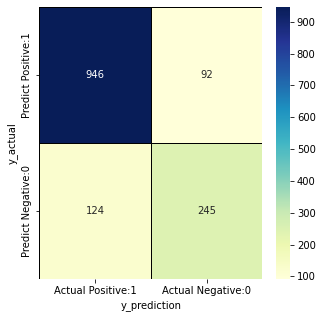

In [48]:
# Visualizing the confusion matrix
f, ax = plt.subplots(figsize = (5, 5))
cm_matrix = pd.DataFrame(data=cm5, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, linewidths=1, linecolor="black",fmt='d', cmap='YlGnBu', ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

# Naive Bayes Classification

In [49]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("accuracy of naive bayes: ", nb.score(x_test, y_test))
nb_score = nb.score(x_test, y_test)
y_pred6 = nb.predict(x_test)

accuracy of naive bayes:  0.7213930348258707


Visualizing and printing confusion matrix

In [50]:
from sklearn.metrics import confusion_matrix
cm6 = confusion_matrix(y_test, y_pred6)
print('Confusion matrix\n\n', cm6)
print('\nTrue Positives(TP) = ', cm6[0,0])
print('\nTrue Negatives(TN) = ', cm6[1,1])
print('\nFalse Positives(FP) = ', cm6[0,1])
print('\nFalse Negatives(FN) = ', cm6[1,0])

Confusion matrix

 [[678 360]
 [ 32 337]]

True Positives(TP) =  678

True Negatives(TN) =  337

False Positives(FP) =  360

False Negatives(FN) =  32


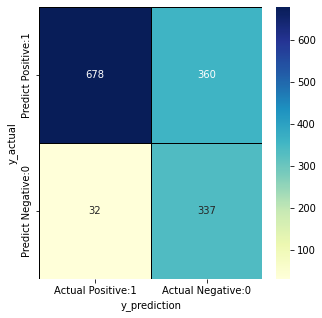

In [51]:
# Visualizing the confusion matrix
f, ax = plt.subplots(figsize = (5, 5))
cm_matrix = pd.DataFrame(data=cm6, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, linewidths=1, linecolor="black",fmt='d', cmap='YlGnBu', ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

# Compare Classification Models

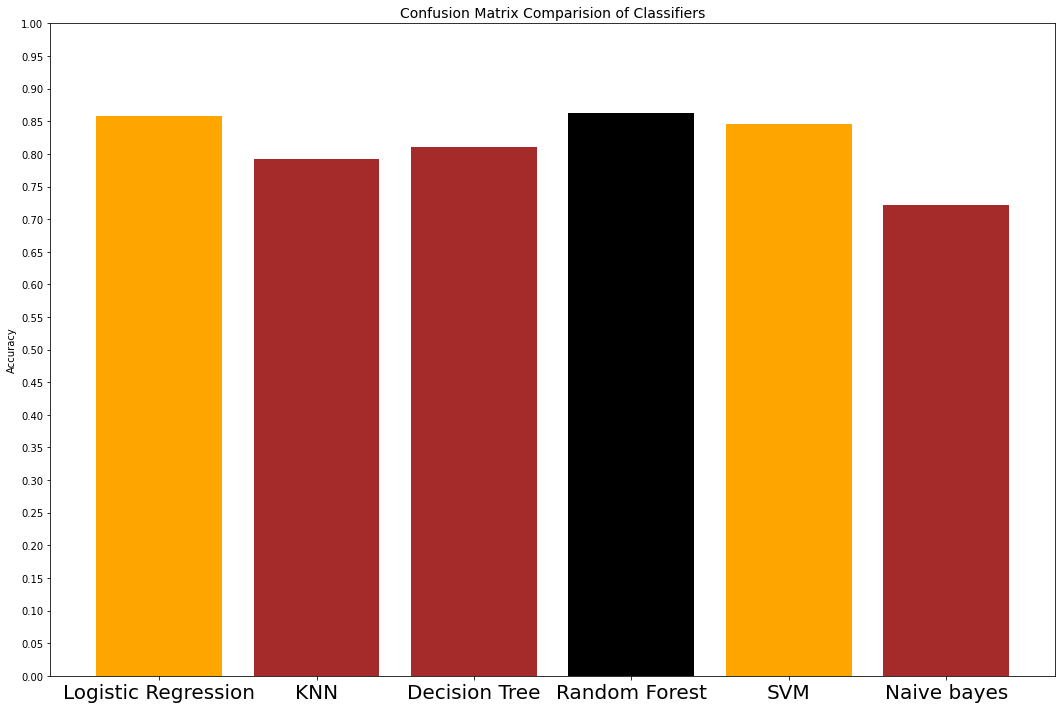

In [52]:
class_name = ("Logistic Regression", "KNN", "Decision Tree", "Random Forest", "SVM", "Naive bayes")
class_score = (lr_score, knn_score, dt_score, rf_score, svm_score, nb_score)
y_pos = np.arange(len(class_score))
colors = ("orange", "brown", "brown","black", "orange","brown")
plt.figure(figsize=(18, 12))
plt.bar(y_pos, class_score, color=colors)
plt.xticks(y_pos, class_name, fontsize=20)
plt.yticks(np.arange(0.00, 1.05, step = 0.05))
plt.ylabel("Accuracy")

plt.title("Confusion Matrix Comparision of Classifiers", fontsize=14)
# plt.savefig("graph.png")
plt.show()

In [53]:
print(class_score)

(0.8578535891968728, 0.7917555081734187, 0.8102345415778252, 0.8621179815209666, 0.8464818763326226, 0.7213930348258707)
